In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_excel("creditscore1.xlsx")

In [110]:
df.head()

,BureauInquiries,CreditUsage,TotalCredit,CollectionReports,MissedPayments,HomeOwner,CreditAge,TimeOnJob,Repay
0,7,0.27,18000,0,2,0,6.4,3,0
1,7,0.23,16000,0,1,1,6.7,6,1
2,7,0.27,18000,0,1,0,6.4,3,1
3,8,0.23,21000,0,0,1,7.1,6,0
4,8,0.42,32000,0,2,0,10.1,6,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BureauInquiries    3918 non-null   int64  
 1   CreditUsage        3918 non-null   float64
 2   TotalCredit        3918 non-null   int64  
 3   CollectionReports  3918 non-null   int64  
 4   MissedPayments     3918 non-null   int64  
 5   HomeOwner          3918 non-null   int64  
 6   CreditAge          3918 non-null   float64
 7   TimeOnJob          3918 non-null   int64  
 8   Repay              3918 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 275.6 KB


FULL DATASET

In [112]:
X_full=df.drop('Repay',axis=1)
X_full.head()

,BureauInquiries,CreditUsage,TotalCredit,CollectionReports,MissedPayments,HomeOwner,CreditAge,TimeOnJob
0,7,0.27,18000,0,2,0,6.4,3
1,7,0.23,16000,0,1,1,6.7,6
2,7,0.27,18000,0,1,0,6.4,3
3,8,0.23,21000,0,0,1,7.1,6
4,8,0.42,32000,0,2,0,10.1,6


In [113]:
y=df["Repay"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Repay, dtype: int64

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.25,random_state=42)

In [115]:
logreg1 = LogisticRegression()
# fit the model with data
logreg1.fit(X_train,y_train)

LogisticRegression()

In [116]:
y_pred=logreg1.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

<Axes: >

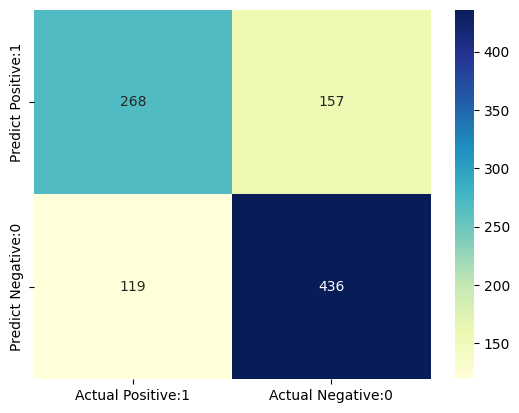

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7183673469387755
Precision: 0.7352445193929174
Recall: 0.7855855855855856


In [119]:
print('Training set score: {:.4f}'.format(logreg1.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg1.score(X_test, y_test)))

Training set score: 0.6848
Test set score: 0.7184


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       425
           1       0.74      0.79      0.76       555

    accuracy                           0.72       980
   macro avg       0.71      0.71      0.71       980
weighted avg       0.72      0.72      0.72       980



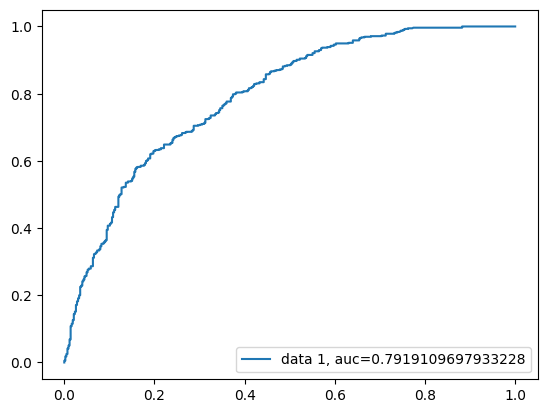

In [121]:
y_pred_proba = logreg1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

FOUR PREDICTORS

In [122]:
df.columns

Index(['BureauInquiries', 'CreditUsage', 'TotalCredit', 'CollectionReports',
       'MissedPayments', 'HomeOwner', 'CreditAge', 'TimeOnJob', 'Repay'],
      dtype='object')

In [123]:
X_four=df[['BureauInquiries', 'CreditUsage', 'MissedPayments', 'CreditAge']]
X_four.head()

,BureauInquiries,CreditUsage,MissedPayments,CreditAge
0,7,0.27,2,6.4
1,7,0.23,1,6.7
2,7,0.27,1,6.4
3,8,0.23,0,7.1
4,8,0.42,2,10.1


In [124]:
y=df["Repay"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Repay, dtype: int64

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X_four,y,test_size=0.25,random_state=42)

In [126]:
logreg2 = LogisticRegression()
# fit the model with data
logreg2.fit(X_train,y_train)

LogisticRegression()

In [127]:
y_pred=logreg2.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

<Axes: >

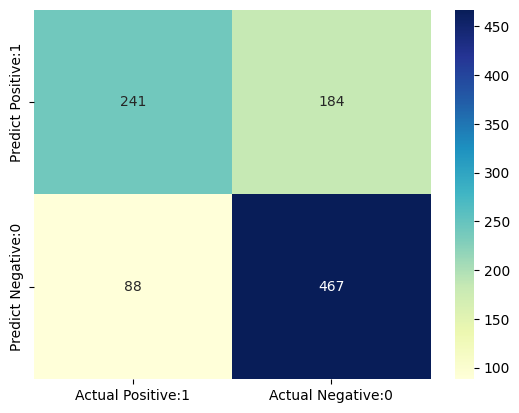

In [128]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7224489795918367
Precision: 0.717357910906298
Recall: 0.8414414414414414


In [130]:
print('Training set score: {:.4f}'.format(logreg2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg2.score(X_test, y_test)))

Training set score: 0.6869
Test set score: 0.7224


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       425
           1       0.72      0.84      0.77       555

    accuracy                           0.72       980
   macro avg       0.72      0.70      0.71       980
weighted avg       0.72      0.72      0.72       980



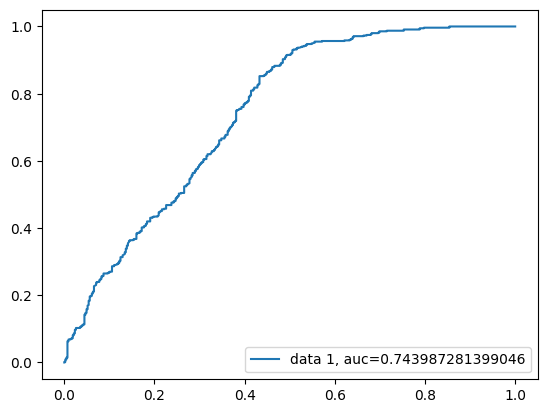

In [132]:
y_pred_proba = logreg2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ONLY SIGNIFICANT PREDICTORS

In [133]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
X_sig=df.drop("Repay",axis=1)
y=df["Repay"]

In [135]:
# VIF = 1: There is no correlation between a given predictor variable and any other predictor variables in the model.
# VIF between 1 and 5: There is moderate correlation between a given predictor variable and other predictor variables in the model.
# VIF > 5: There is severe correlation between a given predictor variable and other predictor variables in the model.

# To address this issue, removing features with high correlation is advisable to improve the efficiency and accuracy of the prediction model.

vif = [variance_inflation_factor(X_sig.values, ix) for ix in range(X_sig.shape[1])]
i=0
for column in X_sig.columns:
    print (column ,"--->",  vif[i])
    i = i+1

BureauInquiries ---> 26.500099732939145
CreditUsage ---> 8.387379305527528
TotalCredit ---> 10.494272280235142
CollectionReports ---> 1.4544079081098102
MissedPayments ---> 2.1534048792840363
HomeOwner ---> 2.8886149068451363
CreditAge ---> 15.564792338596448
TimeOnJob ---> 6.379080633410177


In [191]:
X_sig=df[['CollectionReports','MissedPayments', 'HomeOwner']]
y=df["Repay"]

In [192]:
X_sig.head()

,CollectionReports,MissedPayments,HomeOwner
0,0,2,0
1,0,1,1
2,0,1,0
3,0,0,1
4,0,2,0


In [193]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Repay, dtype: int64

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X_sig,y,test_size=0.25,random_state=42)

In [195]:
logreg3 = LogisticRegression()
# fit the model with data
logreg3.fit(X_train,y_train)

LogisticRegression()

In [196]:
y_pred=logreg3.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

<Axes: >

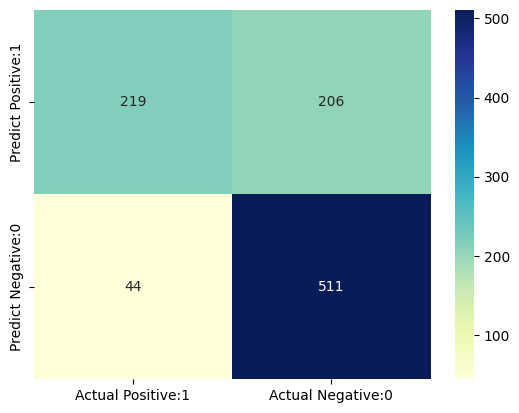

In [197]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [198]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7448979591836735
Precision: 0.7126917712691772
Recall: 0.9207207207207208


In [199]:
print('Training set score: {:.4f}'.format(logreg3.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg3.score(X_test, y_test)))

Training set score: 0.7233
Test set score: 0.7449


In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64       425
           1       0.71      0.92      0.80       555

    accuracy                           0.74       980
   macro avg       0.77      0.72      0.72       980
weighted avg       0.76      0.74      0.73       980



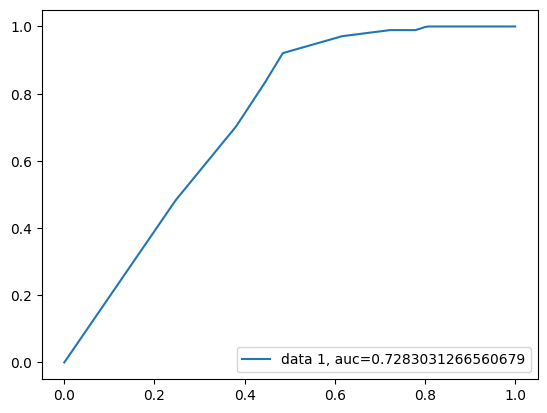

In [201]:
y_pred_proba = logreg3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Accuracy
> 1st model (with all predictors) 
* 0.7183673469387755
> 2nd model (any four predictors)
* 0.7224489795918367
> 3rd model (with only significant predictors)
* 0.7448979591836735

# Third Model(with only significant predictors) is better than the other two models i.e. first model(with all predictors) and second model(with any four predictors)